In [10]:
import numpy as np
import cv2
import os

pictures = []

for filepath in os.listdir('simple_clock/'):
    pic_bgr = cv2.imread('simple_clock/{0}'.format(filepath), 1)
    pic_rgb = pic_bgr[:,:,::-1]
    pictures.append(pic_rgb)

x = np.stack(pictures, axis = 0)
print(x.shape)
print(len(pictures))
print(pictures[1].shape)
print(type(pictures[1]))

(720, 65, 62, 3)
720
(65, 62, 3)
<class 'numpy.ndarray'>


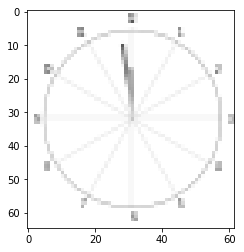

In [17]:
from matplotlib import pyplot as plt

plt.imshow(pictures[719])
plt.show()

In [12]:
y = np. zeros((720, 2))
for i in range(720):
    y[i][0] = np.interp(i,[0,720],[0,360])

for h in range(12):
    for m in range(60):
        y[h*60+m][1] = np.interp(m,[0,60],[0,360])
print(y)

[[  0.    0. ]
 [  0.5   6. ]
 [  1.   12. ]
 ...
 [358.5 342. ]
 [359.  348. ]
 [359.5 354. ]]


In [15]:
pix = []

for filepath in os.listdir('simple_clock/'):
    pix.append(cv2.imread('simple_clock/{0}'.format(filepath), cv2.IMREAD_GRAYSCALE))

x_gray = np.stack(pix, axis = 0)
print(x_gray.shape)
print(len(pix))
print(pix[1].shape)
print(type(pix[1]))

(720, 65, 62)
720
(65, 62)
<class 'numpy.ndarray'>


In [16]:
import h5py

with h5py.File('simple_clock.hdf5', 'w') as f:
    f.create_dataset('training_input', data=x)
    f.create_dataset('output_labels', data=y)
    f.create_dataset('training_input_grayscale', data=x_gray)